In [2]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# calculate the accuracy of the model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data
train = pd.read_pickle("train/all_data_train.pkl")
test = pd.read_pickle("test/all_data_test.pkl")
valid = pd.read_pickle("valid/all_data_valid.pkl")

In [4]:
# Select only numeric columns for NaN and infinity handling
numeric_train = train.select_dtypes(include=[np.number])
numeric_test = test.select_dtypes(include=[np.number])
numeric_valid = valid.select_dtypes(include=[np.number])


# Replace infinite values with NaN
numeric_train.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_test.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_valid.replace([np.inf, -np.inf], np.nan, inplace=True)


# Fill NaN values with the column's mean
numeric_train.fillna(numeric_train.mean(), inplace=True)
numeric_test.fillna(numeric_test.mean(), inplace=True)
numeric_valid.fillna(numeric_valid.mean(), inplace=True)


# Update the original data with the cleaned numeric data
train[numeric_train.columns] = numeric_train
test[numeric_test.columns] = numeric_test
valid[numeric_valid.columns] = numeric_valid


# Split the data into features and labels
X_train = train.drop(columns=["class"])
y_train = train["class"]

X_test = test.drop(columns=["class"])
y_test = test["class"]

X_valid = valid.drop(columns=["class"])
y_valid = valid["class"]

In [6]:
#  create the grid
param_grid = {"max_depth": np.arange(1, 30), "criterion": ["gini", "entropy"]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, param_grid, cv=5)
tree_cv.fit(X_train, y_train)

# print the best hyperparameters
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 11}
Best score is 0.8489360299885054


In [9]:
# plot the tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.605619 to fit



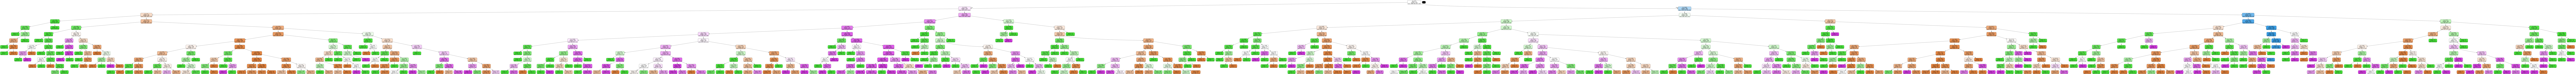

In [10]:
# plot the tree
dot_data = StringIO()
export_graphviz(
    tree_cv.best_estimator_,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [12]:
# test the model
y_pred = tree_cv.predict(X_test)
print("Test set predictions:\n", y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Test set predictions:
 ['walk' 'walk' 'walk' ... 'run' 'jump' 'walk']
Accuracy:  0.8719532554257096


In [13]:
# validate the model
y_pred = tree_cv.predict(X_valid)
print("Validation set predictions:\n", y_pred)

# calculate the accuracy
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: ", accuracy)

Validation set predictions:
 ['walk' 'walk' 'walk' ... 'run' 'run' 'walk']
Accuracy:  0.8898898898898899


In [17]:
# Normalize the data
scaler = StandardScaler()
X_train_N = scaler.fit_transform(X_train)
X_test_N = scaler.transform(X_test)
X_valid_N = scaler.transform(X_valid)

In [21]:
# train the model
tree_cv_n = GridSearchCV(tree, param_grid, cv=5)
tree_cv_n.fit(X_train_N, y_train)
# print the best hyperparameters
print("Tuned Decision Tree Parameters: {}".format(tree_cv_n.best_params_))
print("Best score is {}".format(tree_cv_n.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 11}
Best score is 0.8477124172894934


In [22]:
y_pred = tree_cv_n.predict(X_test_N)
print("Test set predictions:\n", y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Test set predictions:
 ['walk' 'walk' 'walk' ... 'run' 'jump' 'walk']
Accuracy:  0.8721202003338898


In [23]:
y_pred = tree_cv_n.predict(X_valid_N)
print("Validation set predictions:\n", y_pred)

accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: ", accuracy)

Validation set predictions:
 ['walk' 'walk' 'walk' ... 'run' 'run' 'walk']
Accuracy:  0.8878878878878879
